## Exercise 2 - Machine Learning 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

In [ ]:
# Load the dataset
dataset = pd.read_csv('schizophrenia_data.csv')
labels = pd.read_csv('schizophrenia_labels.csv')

data = dataset.drop(columns=['Unnamed: 0'])
X = data.values

y = labels['Target'].map({'control': 0, 'schizophrenia': 1}).values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
data.columns


Index(['DDR1', 'RFC2', 'HSPA6', 'PAX8', 'GUCA1A', 'UBA7', 'THRA', 'PTPN21',
       'CCL5', 'CYP2E1',
       ...
       'ACTB.2', 'ACTB.3', 'ACTB.4', 'GAPDH.3', 'GAPDH.4', 'GAPDH.5',
       'STAT1.2', 'STAT1.3', 'STAT1.4', 'STAT1.5'],
      dtype='object', length=21074)

In [ ]:
unpenalized_lr = LogisticRegression(penalty= None,solver='lbfgs',max_iter=1000)

unpenalized_lr.fit(X_train, y_train)

y_train_pred = unpenalized_lr.predict(X_train)
y_test_pred  = unpenalized_lr.predict(X_test)

y_train_prob = unpenalized_lr.predict_proba(X_train)[:, 1]
y_test_prob  = unpenalized_lr.predict_proba(X_test)[:, 1]


In [ ]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
C_values = [1.0 / lam for lam in lambdas]

models_l1 = {}
for lam, C in zip(lambdas, C_values):
    model = LogisticRegression(
        penalty='l1',
        solver='saga',
        C=C,
        max_iter=2000,
        tol=1e-4
    )
    model.fit(X_train, y_train)
    
    models_l1[lam] = model

In [ ]:
models_l2 = {}
for lam, C in zip(lambdas, C_values):
    model = LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        C=C,
        max_iter=1000,
        tol=1e-4
    )
    model.fit(X_train, y_train)
    
    models_l2[lam] = model

In [ ]:
#Metrics dictionary to capture everything
metrics = {
    'unpenalized': {'train': {}, 'test': {}},
    'l1': {lam: {'train': {}, 'test': {}} for lam in lambdas},
    'l2': {lam: {'train': {}, 'test': {}} for lam in lambdas}}

#npenalized
y_tr_pred = unpenalized_lr.predict(X_train)
y_te_pred = unpenalized_lr.predict(X_test)
y_tr_prob = unpenalized_lr.predict_proba(X_train)[:, 1]
y_te_prob = unpenalized_lr.predict_proba(X_test)[:, 1]

metrics['unpenalized']['train']['accuracy'] = accuracy_score(y_train, y_tr_pred)
metrics['unpenalized']['train']['f1']       = f1_score(y_train, y_tr_pred)
metrics['unpenalized']['train']['auroc']    = roc_auc_score(y_train, y_tr_prob)
metrics['unpenalized']['train']['aupr']     = average_precision_score(y_train, y_tr_prob)

metrics['unpenalized']['test']['accuracy']  = accuracy_score(y_test, y_te_pred)
metrics['unpenalized']['test']['f1']        = f1_score(y_test, y_te_pred)
metrics['unpenalized']['test']['auroc']     = roc_auc_score(y_test, y_te_prob)
metrics['unpenalized']['test']['aupr']      = average_precision_score(y_test, y_te_prob)

#L1‐penalized
for lam, model in models_l1.items():
    y_tr_pred = model.predict(X_train)
    y_te_pred = model.predict(X_test)
    y_tr_prob = model.predict_proba(X_train)[:, 1]
    y_te_prob = model.predict_proba(X_test)[:, 1]
    
    metrics['l1'][lam]['train']['accuracy'] = accuracy_score(y_train, y_tr_pred)
    metrics['l1'][lam]['train']['f1']       = f1_score(y_train, y_tr_pred)
    metrics['l1'][lam]['train']['auroc']    = roc_auc_score(y_train, y_tr_prob)
    metrics['l1'][lam]['train']['aupr']     = average_precision_score(y_train, y_tr_prob)

    metrics['l1'][lam]['test']['accuracy']  = accuracy_score(y_test, y_te_pred)
    metrics['l1'][lam]['test']['f1']        = f1_score(y_test, y_te_pred)
    metrics['l1'][lam]['test']['auroc']     = roc_auc_score(y_test, y_te_prob)
    metrics['l1'][lam]['test']['aupr']      = average_precision_score(y_test, y_te_prob)

#L2‐penalized
for lam, model in models_l2.items():
    y_tr_pred = model.predict(X_train)
    y_te_pred = model.predict(X_test)
    y_tr_prob = model.predict_proba(X_train)[:, 1]
    y_te_prob = model.predict_proba(X_test)[:, 1]
    
    metrics['l2'][lam]['train']['accuracy'] = accuracy_score(y_train, y_tr_pred)
    metrics['l2'][lam]['train']['f1']       = f1_score(y_train, y_tr_pred)
    metrics['l2'][lam]['train']['auroc']    = roc_auc_score(y_train, y_tr_prob)
    metrics['l2'][lam]['train']['aupr']     = average_precision_score(y_train, y_tr_prob)

    metrics['l2'][lam]['test']['accuracy']  = accuracy_score(y_test, y_te_pred)
    metrics['l2'][lam]['test']['f1']        = f1_score(y_test, y_te_pred)
    metrics['l2'][lam]['test']['auroc']     = roc_auc_score(y_test, y_te_prob)
    metrics['l2'][lam]['test']['aupr']      = average_precision_score(y_test, y_te_prob)


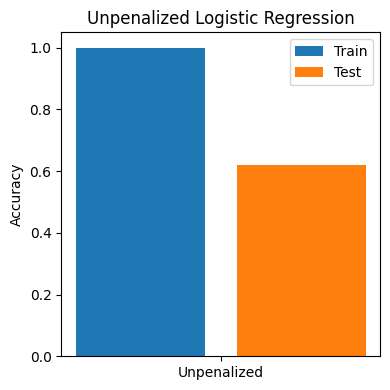

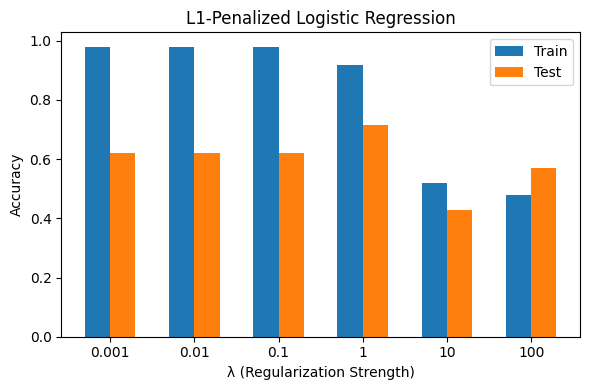

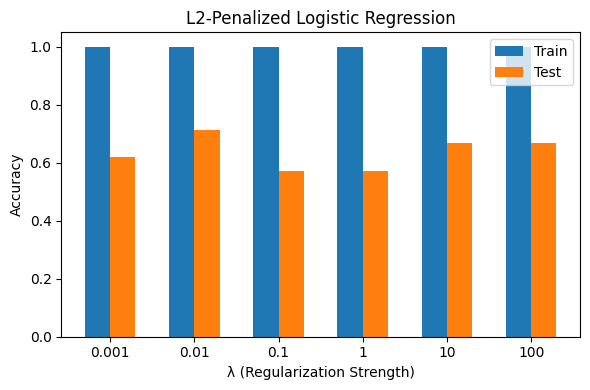

In [ ]:
#Unpenalized barplot
fig, ax = plt.subplots(figsize=(4, 4))
train_acc = metrics['unpenalized']['train']['accuracy']
test_acc  = metrics['unpenalized']['test']['accuracy']

ax.bar([0], [train_acc], width=0.4, label='Train', color='tab:blue')
ax.bar([0.5], [test_acc], width=0.4, label='Test',  color='tab:orange')

ax.set_xticks([0.25])
ax.set_xticklabels(['Unpenalized'])
ax.set_ylabel('Accuracy')
ax.set_title('Unpenalized Logistic Regression')
ax.legend()
plt.tight_layout()
plt.show()

#L1‐penalized barplot
fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(len(lambdas))  # indices 0..5

train_vals_l1 = [metrics['l1'][lam]['train']['accuracy'] for lam in lambdas]
test_vals_l1  = [metrics['l1'][lam]['test']['accuracy']  for lam in lambdas]

ax.bar(x - 0.15, train_vals_l1, width=0.3, label='Train', color='tab:blue')
ax.bar(x + 0.15, test_vals_l1,  width=0.3, label='Test',  color='tab:orange')

ax.set_xticks(x)
ax.set_xticklabels([str(lam) for lam in lambdas])
ax.set_xlabel('λ (Regularization Strength)')
ax.set_ylabel('Accuracy')
ax.set_title('L1‐Penalized Logistic Regression')
ax.legend()
plt.tight_layout()
plt.show()

#L2‐penalized barplot
fig, ax = plt.subplots(figsize=(6, 4))
train_vals_l2 = [metrics['l2'][lam]['train']['accuracy'] for lam in lambdas]
test_vals_l2  = [metrics['l2'][lam]['test']['accuracy']  for lam in lambdas]

ax.bar(x - 0.15, train_vals_l2, width=0.3, label='Train', color='tab:blue')
ax.bar(x + 0.15, test_vals_l2,  width=0.3, label='Test',  color='tab:orange')

ax.set_xticks(x)
ax.set_xticklabels([str(lam) for lam in lambdas])
ax.set_xlabel('λ (Regularization Strength)')
ax.set_ylabel('Accuracy')
ax.set_title('L2‐Penalized Logistic Regression')
ax.legend()
plt.tight_layout()
plt.show()


from the plots we can say that the best on test‐set Method is L1 with λ = 1 or L2 with λ = 0.01

In [13]:
best_l1_test = max((metrics['l1'][lam]['test']['accuracy'], lam) for lam in lambdas)

best_l2_test = max((metrics['l2'][lam]['test']['accuracy'], lam) for lam in lambdas)

print(best_l1_test, best_l2_test)

(0.7142857142857143, 1) (0.7142857142857143, 0.01)
